# Neural Networks

## Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pylab as plt

import random
random.seed(17)

## Load & Analyze Dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

print('Dataset type:', type(train_images))
print('Training shape:', train_images.shape)
print('Testing shape:', test_images.shape)

In [ ]:
print('Instances per class')
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [ ]:
class_names = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preview Images


In [ ]:
train_idx = list(range(len(train_labels)))
sampler = random.sample(train_idx, 16)
sampler

[8805,
 37303,
 55537,
 52577,
 50054,
 4135,
 16716,
 7727,
 32468,
 49870,
 29457,
 30949,
 42702,
 24878,
 51689,
 13759]

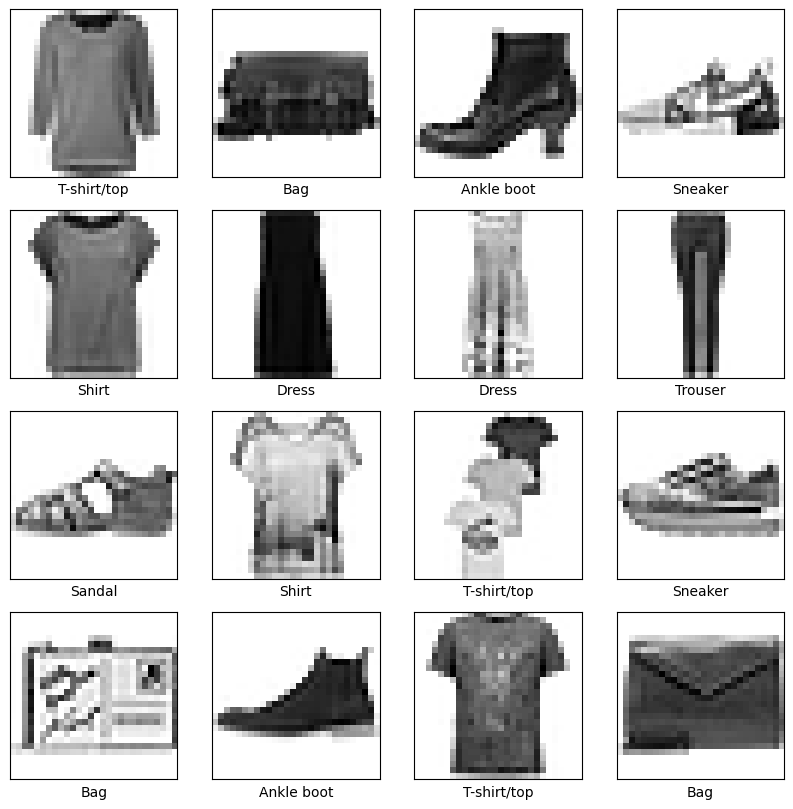

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(sampler)):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[sampler[i]], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[sampler[i]]])
plt.show()


**What does one image look like?**

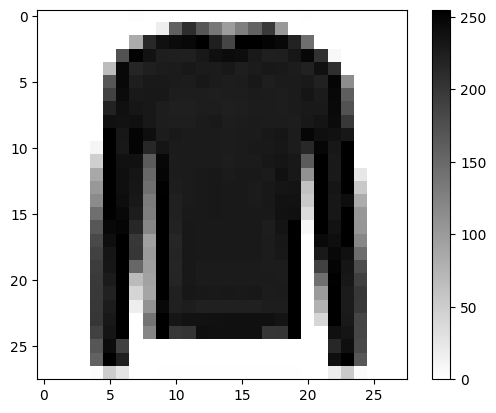

In [25]:
random_image_id = 15000
plt.figure()
plt.imshow(train_images[random_image_id],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [26]:
class_names[train_labels[random_image_id]]

'Pullover'

In [27]:
train_images[random_image_id]

array([[  0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  17, 159, 210, 169,
        135,  98, 128, 156, 197, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  84, 215, 239, 244, 247, 255,
        224, 186, 255, 255, 251, 246, 220, 145,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 172, 252, 236, 225, 224, 224, 230,
        240, 244, 242, 229, 224, 225, 233, 248, 205,   7,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  67, 246, 218, 224, 227, 228, 230, 228,
        228, 230, 225, 228, 231, 229, 227, 221, 238, 208,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 168, 246, 225, 229, 229, 228, 227, 230,
        228, 226, 227, 230, 225, 228, 228, 229, 221, 250, 114,   0,   0,
          0,   0],
       [  

## Build, compile and train the model

In [28]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

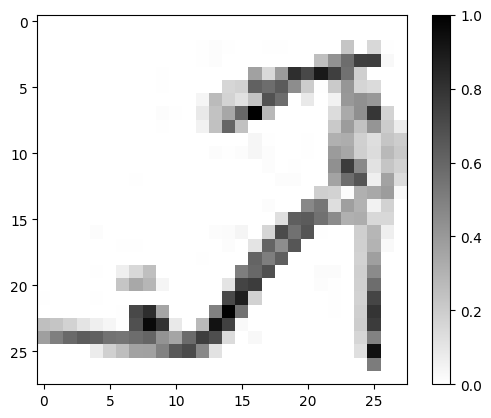

In [29]:
plt.figure()
plt.imshow(train_images[8], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

- Our input layer is 28x28 grid of values
    - We want to flatten it into a single vector
    - This results in vector with 28x28 = 784 pixel values
- We have 2 hidden layers
    - 128 nodes
    - 64 nodes
- Resulting output layer is 10 nodes
    - Each node corresponds to a class
    - Node with the highest probability score is the selected classification
- General training process
    - Take a batch of images and their labels
    - Forward pass through network
    - Calculate loss of the network batch
    - Update the weights of the NN

In [ ]:
# build
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10),
])

# compile
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# train
model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)

c:\Users\Me\Documents\Projects\LinkedInLearning\Python\TensorFlowTables\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7642 - loss: 0.6842 - val_accuracy: 0.8512 - val_loss: 0.4252
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8587 - loss: 0.3938 - val_accuracy: 0.8682 - val_loss: 0.3655
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8745 - loss: 0.3440 - val_accuracy: 0.8748 - val_loss: 0.3378
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8830 - loss: 0.3149 - val_accuracy: 0.8778 - val_loss: 0.3283
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8923 - loss: 0.2944 - val_accuracy: 0.8798 - val_loss: 0.3244
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8969 - loss: 0.2774 - val_accuracy: 0.8795 - val_loss: 0.3425
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8997 - loss: 0.2694 - val_accuracy: 0.8808 - val_loss: 0.3384
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9041 - loss: 0.2582 - val_accuracy: 0.

In [31]:
# FashionMNIST
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

You must install pydot (`pip install pydot`) for `plot_model` to work.


## Make predictions


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


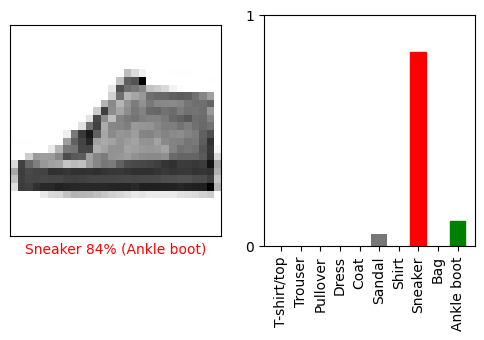

In [32]:
image_id = 107 # Pick an image id between 0 and 9999 inclusive

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks(range(10))
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(image_id, predictions[image_id], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(image_id, predictions[image_id],  test_labels)
_ = plt.xticks(range(10), class_names, rotation=90)
plt.show()